# Real-Time Location System Case Study
## MSDS 7333 - Section 404
## Unit 6: Case Study

[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

# Table of Contents
* [Team Members](#Team-Members)
* [Abstract](#Abstract)
* [Introduction](#Introduction)
* [Literature Review](#Literature-Review)
* [Background](#Background)
* [Methods](#Methods)
* [Results](#Results)
* [Future Work, Discussion, and Conclusion](#Conclusion)
* [References](#References)

# <a name="Team-Members"></a>Team Members
* [Jostein Barry-Straume](https://github.com/josteinstraume)

# <a name="Abstract"></a>Abstract

> In this case study, the application of Signal Frontier Analysis is presented. Eight arbitrarily chosen stocks comprise a portfolio for which said analysis is conducted. Cumulative returns for each stock are computed, plotted, and inspected. Subsequently, the computed Sharpe ratios for various holding and lookback periods shed insight with regards to the optimal risk-return for this given portfolio.

# <a name="Introduction"></a>Introduction

> The methods by which an investor selects stocks for a portfolio can vary from anything to a gut feeling to a complex 'black box' algorithm. The former strategy involves trading on "emotion and suggestions of others, including friends, family and financial gurus" [1]. Individuals who follow such audacious decision making are often referred to as sheep, contrasting with the image of bulls and bears [1]. Hedge Funds and "some of the world's largest investment managers" now use the latter strategy to "manage their complicated investment strategies" [2]. Such a system inherently involves ethical implications, as a portfolio's risk may "conceal their true risk under the guise of proprietary technology" [2]. The below XKCD webcomic is tongue-in-cheek jab at the behind-the-scenes decision making of financial traders, which at times is seemingly following the previously mentioned sheep strategy.

![Xkcd: Marketwatch[3]](../images/marketwatch.png)

> Between these two ends of the investment spectrum lies momentum trading. Momentum trading involves analyzing the recent past performance of a given basket of stocks in order to discern the optimal time for which to hold a given stock or portfolio [4]. One of the tools a momentum trader uses is Signal Frontier Analysis. This analysis involves deriving the Sharpe ratio of a certain portfolio.

> Developed in 1966 by the Nobel Laureate William F. Sharpe, the Sharpe ratio "has become the most widely used method for calculating risk-adjusted return" [5]. The Sharpe ratio represents the "average return earned in excess of the risk-free rate per unit of volatility or total risk" [5]. As a result, the performance of a stock can isolated with regard to its risk by subtracting the risk-free rate from the mean return [5]. A real-life application of the Sharpe ratio would be U.S. Treasury bills, which carry a Sharpe ratio of zero since they are considered to be risk free [5]. The purpose of this case study is to apply Signal Frontier Analysis to a wide range of arbitrarily chosen stocks representing a given portfolio. From there, the optimal momentum strategy of holding and lookback periods will be distilled from this portfolio.

# <a name="Literature-Review"></a>Literature Review

> In 1994, William F. Sharpe revisits his originally proposed reward-to-variability ratio presented in 1966 which would later become commonly known as the Sharpe ratio. The self-titled paper, "The Sharpe Ratio," delves deeper into his created measurement for a reward-to-variability ratio by providing "more generality and covering a broader range of applications" [6].

> One major criticism of "The Sharpe Ratio" is its reliance on the standard deviation of a portfolio's performance. In the paper, the risk of a portfolio is assumed to be the standard deviation of said portfolio's returns [5]. However, such reasoning inherently presumes the portfolio's returns are normally distributed, which may not be the actual case in real world applications [5]. As a result, application of the Sharpe ratio to a portfolio's returns that knowingly or unknowingly have a non-normal distribution could lead to potential bias and misleading conclusions.

$$SharpeRatio=\frac{\bar{r}_p - r_f} {\sigma{}_p}$$

| Symbol | Description |
| :------: | :-----------: |
| $$\bar{r}_p$$ | Represents the expected portfolio return |
| $$r_f$$ | Represents the risk free rate |
| $$\sigma{}_p$$ | Represents the portfolio's standard deviation |

> Any investment based upon Signal Frontier Analysis using the Sharpe ratio should be met with a healthy dose of skepticism. Although not a black box application, the Sharpe ratio is still not without its concerns and ethical considerations. Investopedia reports that not even the Sharpe ratio is immune to gaming the system by "hedge funds or portfolio managers seeking to boost their apparent risk-adjusted returns history" [5]. One of the gaming methods includes, but is not limited to increasing the length of the measurement interval. By doing so, the standard deviation decreases, which in this model means that the risk of portfolio decreases. For example, a hedge fund or portfolio manager can realize this by changing the measurement interval from daily to weekly or even monthly to produced a lower volatile estimate [5].

# <a name="Background"></a>Background

### Import Dataset

> The dataset will consist of closing stock prices from January 1, 2014 to May 1, 2018 for the following companies:

| Variable | Description |
| :------: | :-----------: |
| t | timestamp in milliseconds since midnight, January 1, 1970 UTC |
| id | MAC address of the scanning device |
| pos | the physical coordinate of the scanning device |
| degree | orientation of the user carrying the scanning device in degrees |
| MAC | MAC address of a responding peer (e.g., an access point or a device in adhoc mode) with the corresponding values for signal strength in dBm (Decibel-milliwatts), the channel frequency and its mode (access point = 3, device in adhoc mode = 1) |

> In order to carry out the signal frontier analysis, the closes prices of the above listed companies will be downloaded from Yahoo Finance via the 'pandas_datareader' library. The below three cells lays the foundation for data importation by calling upon the necessary libraries and packages required for this case study.

![Floor Plan of the Test Environment](../images/floor_plan_test_environment.png)

In [1]:
options(digits = 2)
txt = readLines("../data/offline_final_trace.txt")

In [2]:
sum(substr(txt, 1, 1) == "#")
length(txt)

[1] 5312

[1] 151392

In [3]:
lines = txt[ substr(txt, 1, 1) != "#" ]

processLine = function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  
  if (length(tokens) == 10) 
    return(NULL)
 
  tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6, 
               byrow = TRUE), tmp)
}

options(error = recover, warn = 1)
tmp = lapply(lines, processLine)
offline = as.data.frame(do.call("rbind", tmp), 
                        stringsAsFactors = FALSE)

In [4]:
dim(offline)

names(offline) = c("time", "scanMac", "posX", "posY", "posZ", 
                   "orientation", "mac", "signal", 
                   "channel", "type")

numVars = c("time", "posX", "posY", "posZ", 
            "orientation", "signal")
offline[ numVars ] =  lapply(offline[ numVars ], as.numeric)

offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]
dim(offline)

offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct")

unlist(lapply(offline, class))

[1] 1181628      10

[1] 978443      9

time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

### Summary Statistics

> The summary statistics for each company are found below:

      time                          posX         posY           posZ  
 Min.   :2006-02-10 23:31:58   Min.   : 0   Min.   : 0.0   Min.   :0  
 1st Qu.:2006-02-11 05:21:27   1st Qu.: 2   1st Qu.: 3.0   1st Qu.:0  
 Median :2006-02-11 11:57:58   Median :12   Median : 6.0   Median :0  
 Mean   :2006-02-16 06:57:37   Mean   :14   Mean   : 5.9   Mean   :0  
 3rd Qu.:2006-02-19 06:52:40   3rd Qu.:23   3rd Qu.: 8.0   3rd Qu.:0  
 Max.   :2006-03-09 12:41:10   Max.   :33   Max.   :13.0   Max.   :0  
  orientation      signal   
 Min.   :  0   Min.   :-99  
 1st Qu.: 90   1st Qu.:-69  
 Median :180   Median :-60  
 Mean   :167   Mean   :-62  
 3rd Qu.:270   3rd Qu.:-53  
 Max.   :360   Max.   :-25  

                mac               channel                    scanMac      
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:978443  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                             
 00:14:bf:b1:97:8a:132962   2412000000:145619                             
 00:14:bf:3b:c7:c6:126529   2432000000:126529                             
 00:14:bf:b1:97:90:122315   2427000000:122315                             
 00:14:bf:b1:97:8d:121325   2442000000:121325                             
 (Other)          :183831   (Other)   :120757                             

[1] 203

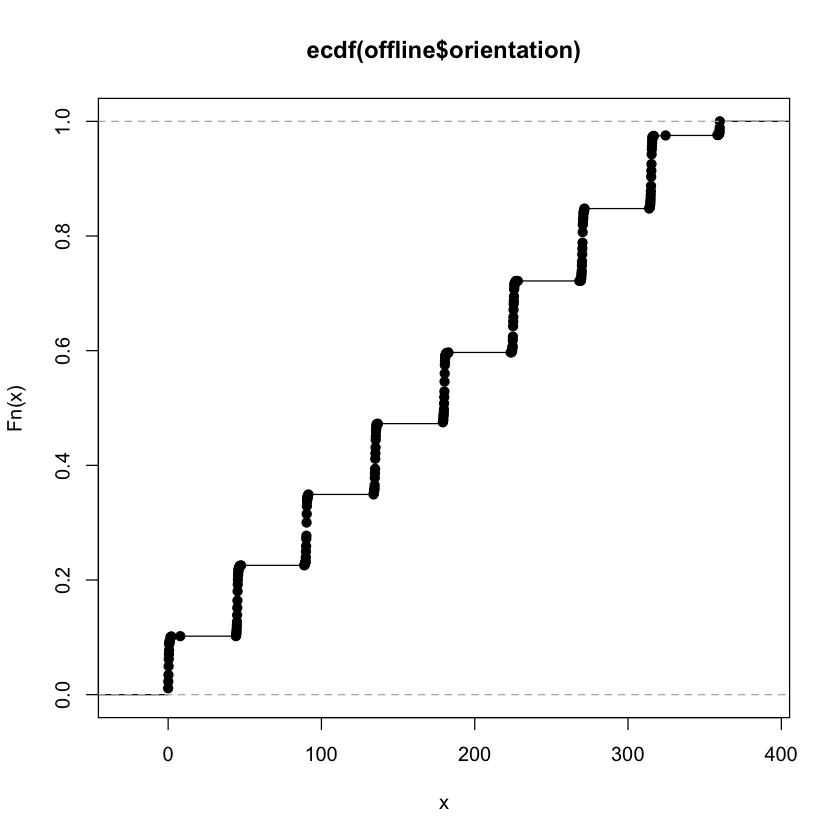

null device 
          1

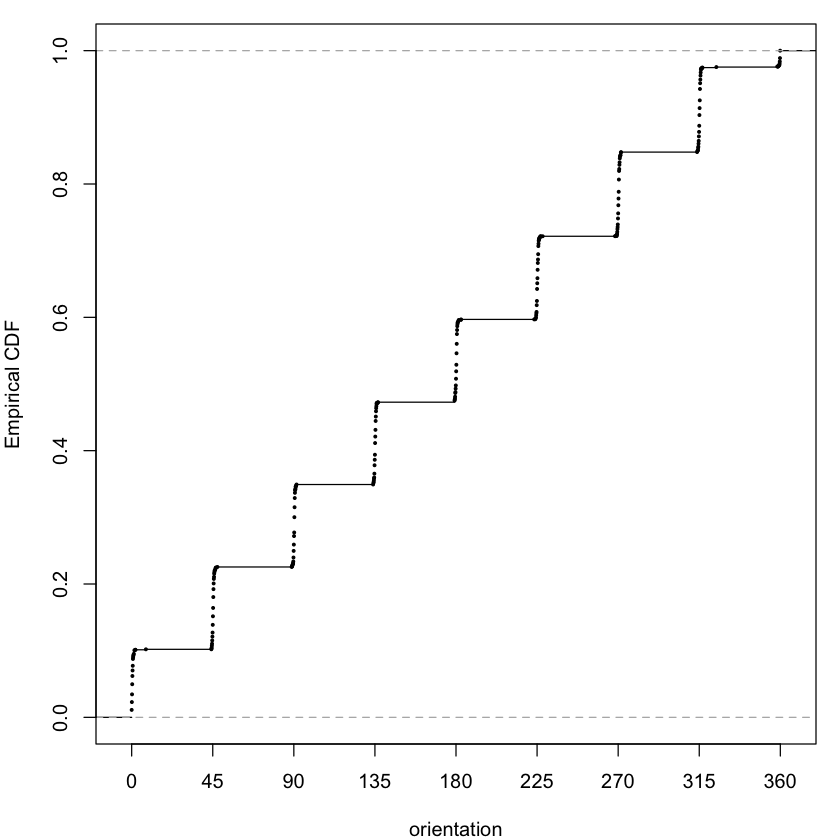

In [5]:
summary(offline[, numVars])

 summary(sapply(offline[ , c("mac", "channel", "scanMac")],
                as.factor))

offline = offline[ , !(names(offline) %in% c("scanMac", "posZ"))]

length(unique(offline$orientation))

plot(ecdf(offline$orientation))

#pdf(file = "Geo_ECDFOrientation.pdf", width = 10, height = 7)
oldPar = par(mar = c(4, 4, 1, 1))
plot(ecdf(offline$orientation), pch = 19, cex = 0.3,
     xlim = c(-5, 365), axes = FALSE,
     xlab = "orientation", ylab = "Empirical CDF", main = "")
box()
axis(2)
axis(side = 1, at = seq(0, 360, by = 45))
par(oldPar)
dev.off()

# <a name="Methods"></a>Methods

> The below cell deals with determining the cumulative returns of each of the eight chosen stocks. First, returns are calculated by taking the percent change based on closing prices. Subsequently, the cumulative return is then calculated as the difference between the cumulative product of 1 plus the percent change of return, minus 1 to isolate for only cumulative returns. The outcome of these calculations are plotted and discussed in the results section.

# 1.5 Nearest Neighbor Methods to Predict Location

# With BOTH MAC ADDRESSES

In [23]:
offlineSubset = 
  offlineSummary[ offlineSummary$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY")) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

trainSS = reshapeSS(offlineSubset, varSignal = "avgSignal")

ERROR: Error in offlineSummary$angle %in% angles: object 'angles' not found


In [18]:
readData = 
  function(filename = '../data/offline_final_trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
     # keep only signals from access points
    offline = offline[ offline$type == "3", ]
    
    # drop scanMac, posZ, channel, and type - no info in them
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline = offline[ , !( names(offline) %in% dropVars ) ]
    
    # drop more unwanted access points
    offline = offline[ offline$mac %in% subMacs, ]
    
    # convert numeric values
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline[ numVars ] = lapply(offline[ numVars ], as.numeric)

    # convert time to POSIX
    offline$rawTime = offline$time
    offline$time = offline$time/1000
    class(offline$time) = c("POSIXt", "POSIXct")
    
    # round orientations to nearest 45
    offline$angle = roundOrientation(offline$orientation)
      
    return(offline)
  }

In [19]:
offlineRedo = readData()

offlineRedo$posXY = paste(offlineRedo$posX, offlineRedo$posY, sep = "-")

byLocAngleAP = with(offlineRedo, 
                    by(offlineRedo, list(posXY, angle, mac), 
                       function(x) x))

signalSummary = 
  lapply(byLocAngleAP,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

offlineSummaryRedo = do.call("rbind", signalSummary)

In [20]:
macs = unique(offlineSummaryRedo$mac)
onlineRedo = readData("../data/online_final_trace.txt", subMacs = macs)

onlineRedo$posXY = paste(onlineRedo$posX, onlineRedo$posY, sep = "-")

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(onlineRedo, 
             by(onlineRedo, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 7,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummaryRedo = do.call("rbind", byLoc)

offlineSubsetRedo = offlineSummaryRedo[ offlineSummaryRedo$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY"),
                     sampleAngle = FALSE, 
                     refs = seq(0, 315, by = 45)) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    if (sampleAngle) {
                      x = x[x$angle == sample(refs, size = 1), ]}
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 7,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

trainSS = reshapeSS(offlineSubsetRedo, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubsetRedo = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubsetRedo, varSignal = "avgSignal")
}

keepVars = c("posXY", "posX", "posY", "orientation", "angle")
onlineCVSummaryRedo = reshapeSS(offlineRedo, keepVars = keepVars,
                            sampleAngle = TRUE)

ERROR: Error in offlineSummaryRedo$angle %in% angles: object 'angles' not found


In [ ]:
names(onlineSummary)

In [ ]:
K = 20
err = rep(0, K)

for (j in 1:v) {
  onlineFoldRedo = subset(onlineCVSummaryRedo, 
                      posXY %in% permuteLocs[ , j])
  offlineFoldRedo = subset(offlineSummaryRedo,
                       posXY %in% permuteLocs[ , -j])
  actualFoldRedo = onlineFoldRedo[ , c("posX", "posY")]
  
  for (k in 1:K) {
    estFoldRedo = predXY(newSignals = onlineFoldRedo[ , 6:11],
                     newAngles = onlineFoldRedo[ , 4], 
                     offlineFoldRedo, numAngles = 3, k = k)
    err[k] = err[k] + calcError(estFoldRedo, actualFoldRedo)
  }
}

In [ ]:
plot(y = err, x = (1:K),  type = "l", lwd= 2,
     ylim = c(1200, 2100),
     xlab = "Number of Neighbors",
     ylab = "Sum of Square Errors")

rmseMin = min(err)
kMin = which(err == rmseMin)[1]
segments(x0 = 0, x1 = kMin, y0 = rmseMin, col = gray(0.4), 
         lty = 2, lwd = 2)
segments(x0 = kMin, x1 = kMin, y0 = 1100,  y1 = rmseMin, 
         col = grey(0.4), lty = 2, lwd = 2)

#mtext(kMin, side = 1, line = 1, at = kMin, col = grey(0.4))
text(x = kMin - 2, y = rmseMin + 40, 
     label = as.character(round(rmseMin)), col = grey(0.4))

In [ ]:
actualXYRedo = onlineSummaryRedo[ , c("posX", "posY")]

estXYk3 = predXY(newSignals = onlineSummaryRedo[ , 6:11],
                 newAngles = onlineSummaryRedo[ , 4],
                 offlineSummaryRedo, numAngles = 3, k = 3)

errorRateWithBoth = calcError(estXYk3, actualXYRedo)
errorRateWithBoth

# Without "00:0f:a3:39:e1:c0"

In [21]:
offlineRedo2 = offlineRedo[ offlineRedo$mac != "00:0f:a3:39:e1:c0", ]


offlineRedo2$posXY = paste(offlineRedo2$posX, offlineRedo2$posY, sep = "-")

byLocAngleAP = with(offlineRedo2, 
                    by(offlineRedo2, list(posXY, angle, mac), 
                       function(x) x))

signalSummary = 
  lapply(byLocAngleAP,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

offlineSummaryRedo2 = do.call("rbind", signalSummary)



In [22]:
macs = unique(offlineSummaryRedo2$mac)
onlineRedo2 = readData("../data/online_final_trace.txt", subMacs = macs)

onlineRedo2$posXY = paste(onlineRedo2$posX, onlineRedo2$posY, sep = "-")

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(onlineRedo2, 
             by(onlineRedo2, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 6,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummaryRedo2 = do.call("rbind", byLoc)

offlineSubsetRedo2 = offlineSummaryRedo2[ offlineSummaryRedo2$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY"),
                     sampleAngle = FALSE, 
                     refs = seq(0, 315, by = 45)) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    if (sampleAngle) {
                      x = x[x$angle == sample(refs, size = 1), ]}
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

trainSS = reshapeSS(offlineSubsetRedo2, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubsetRedo2 = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubsetRedo2, varSignal = "avgSignal")
}

keepVars = c("posXY", "posX", "posY", "orientation", "angle")
onlineCVSummaryRedo2 = reshapeSS(offlineRedo2, keepVars = keepVars,
                            sampleAngle = TRUE)

ERROR: Error in offlineSummaryRedo2$angle %in% angles: object 'angles' not found


In [ ]:
K = 20
err = rep(0, K)

for (j in 1:v) {
  onlineFoldRedo2 = subset(onlineCVSummaryRedo2, 
                      posXY %in% permuteLocs[ , j])
  offlineFoldRedo2 = subset(offlineSummaryRedo2,
                       posXY %in% permuteLocs[ , -j])
  actualFoldRedo2 = onlineFoldRedo2[ , c("posX", "posY")]
  
  for (k in 1:K) {
    estFoldRedo2 = predXY(newSignals = onlineFoldRedo2[ , 6:11],
                     newAngles = onlineFoldRedo2[ , 4], 
                     offlineFoldRedo2, numAngles = 3, k = k)
    err[k] = err[k] + calcError(estFoldRedo2, actualFoldRedo2)
  }
}


In [ ]:
plot(y = err, x = (1:K),  type = "l", lwd= 2,
     ylim = c(900, 2100),
     xlab = "Number of Neighbors",
     ylab = "Sum of Square Errors")

rmseMin = min(err)
kMin = which(err == rmseMin)[1]
segments(x0 = 0, x1 = kMin, y0 = rmseMin, col = gray(0.4), 
         lty = 2, lwd = 2)
segments(x0 = kMin, x1 = kMin, y0 = 1100,  y1 = rmseMin, 
         col = grey(0.4), lty = 2, lwd = 2)

#mtext(kMin, side = 1, line = 1, at = kMin, col = grey(0.4))
text(x = kMin - 2, y = rmseMin + 40, 
     label = as.character(round(rmseMin)), col = grey(0.4))

In [ ]:
actualXYRedo2 = onlineSummaryRedo2[ , c("posX", "posY")]

estXYk6 = predXY(newSignals = onlineSummaryRedo2[ , 6:11],
                 newAngles = onlineSummaryRedo2[ , 4],
                 offlineSummaryRedo2, numAngles = 3, k = 6)

errorRateSansC0 = calcError(estXYk6, actualXYRedo2)
errorRateSansC0

In [ ]:
252.336966666667

# Without "00:0f:a3:39:dd:cd"

In [ ]:
offlineRedo3 = offlineRedo[ offlineRedo$mac != "00:0f:a3:39:dd:cd", ]


offlineRedo3$posXY = paste(offlineRedo3$posX, offlineRedo3$posY, sep = "-")

byLocAngleAP = with(offlineRedo3, 
                    by(offlineRedo3, list(posXY, angle, mac), 
                       function(x) x))

signalSummary = 
  lapply(byLocAngleAP,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

offlineSummaryRedo3 = do.call("rbind", signalSummary)



In [ ]:
macs = unique(offlineSummaryRedo3$mac)
onlineRedo3 = readData("../data/online_final_trace.txt", subMacs = macs)

onlineRedo3$posXY = paste(onlineRedo3$posX, onlineRedo3$posY, sep = "-")

keepVars = c("posXY", "posX","posY", "orientation", "angle")
byLoc = with(onlineRedo3, 
             by(onlineRedo3, list(posXY), 
                function(x) {
                  ans = x[1, keepVars]
                  avgSS = tapply(x$signal, x$mac, mean)
                  y = matrix(avgSS, nrow = 1, ncol = 6,
                        dimnames = list(ans$posXY, names(avgSS)))
                  cbind(ans, y)
                }))

onlineSummaryRedo3 = do.call("rbind", byLoc)

offlineSubsetRedo3 = offlineSummaryRedo3[ offlineSummaryRedo3$angle %in% angles, ]

reshapeSS = function(data, varSignal = "signal", 
                     keepVars = c("posXY", "posX","posY"),
                     sampleAngle = FALSE, 
                     refs = seq(0, 315, by = 45)) {
  byLocation =
    with(data, by(data, list(posXY), 
                  function(x) {
                    if (sampleAngle) {
                      x = x[x$angle == sample(refs, size = 1), ]}
                    ans = x[1, keepVars]
                    avgSS = tapply(x[ , varSignal ], x$mac, mean)
                    y = matrix(avgSS, nrow = 1, ncol = 6,
                               dimnames = list(ans$posXY,
                                               names(avgSS)))
                    cbind(ans, y)
                  }))

  newDataSS = do.call("rbind", byLocation)
  return(newDataSS)
}

trainSS = reshapeSS(offlineSubsetRedo3, varSignal = "avgSignal")

selectTrain = function(angleNewObs, signals = NULL, m = 1){
  # m is the number of angles to keep between 1 and 5
  refs = seq(0, by = 45, length  = 8)
  nearestAngle = roundOrientation(angleNewObs)
  
  if (m %% 2 == 1) 
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
  else {
    m = m + 1
    angles = seq(-45 * (m - 1) /2, 45 * (m - 1) /2, length = m)
    if (sign(angleNewObs - nearestAngle) > -1) 
      angles = angles[ -1 ]
    else 
      angles = angles[ -m ]
  }
  angles = angles + nearestAngle
  angles[angles < 0] = angles[ angles < 0 ] + 360
  angles[angles > 360] = angles[ angles > 360 ] - 360
  angles = sort(angles) 
  
  offlineSubsetRedo3 = signals[ signals$angle %in% angles, ]
  reshapeSS(offlineSubsetRedo3, varSignal = "avgSignal")
}

keepVars = c("posXY", "posX", "posY", "orientation", "angle")
onlineCVSummaryRedo3 = reshapeSS(offlineRedo3, keepVars = keepVars,
                            sampleAngle = TRUE)

In [ ]:
K = 20
err = rep(0, K)

for (j in 1:v) {
  onlineFoldRedo3 = subset(onlineCVSummaryRedo3, 
                      posXY %in% permuteLocs[ , j])
  offlineFoldRedo3 = subset(offlineSummaryRedo3,
                       posXY %in% permuteLocs[ , -j])
  actualFoldRedo3 = onlineFoldRedo3[ , c("posX", "posY")]
  
  for (k in 1:K) {
    estFoldRedo3 = predXY(newSignals = onlineFoldRedo3[ , 6:11],
                     newAngles = onlineFoldRedo3[ , 4], 
                     offlineFoldRedo3, numAngles = 3, k = k)
    err[k] = err[k] + calcError(estFoldRedo3, actualFoldRedo3)
  }
}


In [ ]:
plot(y = err, x = (1:K),  type = "l", lwd= 2,
     ylim = c(900, 2100),
     xlab = "Number of Neighbors",
     ylab = "Sum of Square Errors")

rmseMin = min(err)
kMin = which(err == rmseMin)[1]
segments(x0 = 0, x1 = kMin, y0 = rmseMin, col = gray(0.4), 
         lty = 2, lwd = 2)
segments(x0 = kMin, x1 = kMin, y0 = 1100,  y1 = rmseMin, 
         col = grey(0.4), lty = 2, lwd = 2)

#mtext(kMin, side = 1, line = 1, at = kMin, col = grey(0.4))
text(x = kMin - 2, y = rmseMin + 40, 
     label = as.character(round(rmseMin)), col = grey(0.4))

In [ ]:
actualXYRedo3 = onlineSummaryRedo3[ , c("posX", "posY")]

estXYk10 = predXY(newSignals = onlineSummaryRedo3[ , 6:11],
                 newAngles = onlineSummaryRedo3[ , 4],
                 offlineSummaryRedo3, numAngles = 3, k = 10)

errorRateSansCD = calcError(estXYk10, actualXYRedo3)
errorRateSansCD

In [ ]:
errorRateSansCD

# Results

In [ ]:
errorRateWithBoth

In [ ]:
errorRateSansC0

In [ ]:
errorRateSansCD

> The error rates for each scenario of this case study are shown below:

| Dataset | Error Rate |
| :-----: | :--------: |
| errorRateWithBoth | 244.206966666667 |
| errorRateSansC0 | 252.336966666667 |
| errorRateSansCD | 296.4563 |

> Of the two MAC addresses, "00:0f:a3:39:e1:c0" and "00:0f:a3:39:dd:cd", the former yields the better prediction of location. Consequently, given the choice between the two, the MAC address "00:0f:a3:39:e1:c0" should be used over "00:0f:a3:39:dd:cd" due to its lower error rate. However, as reflected in the below table, using the data for both MAC addresses simultaneously yield more accurate prediction of location.

In [ ]:
names(offlineRedo)

In [ ]:
names(offlineRedoSummary)

In [ ]:
dist<-function(point1, point2){
    sum=0
    for (i in 1:length(point1)){
        sum=sum+(point2[i]-point1[i])^2
    }
    return(sqrt(sum))
}

knn<-function(k, data, loc, target_loc){
temp<-data  # make a copy of the array,  not sure if needed, but being safe
    temp$dist=apply(X=temp[,-target_loc],1,FUN=dist, loc)
    temp<-temp[order(temp$dist),]
    nn=temp[1:k,target_loc]
    vote=sort(table(nn),decreasing=TRUE)[1]
    val<-names(vote)
    return(names(vote)) 
    }


In [ ]:
knn(3, online, c(0,0), c(3, 4))

In [ ]:
offlineRedo[1,]

In [ ]:
onlineRedoSummary2[1,]

# Weighted KNN

In [ ]:
findNN = function(newSignal, trainSubset) {
  diffs = apply(trainSubset[ , 4:9], 1, 
                function(x) x - newSignal)
  dists = apply(diffs, 2, function(x) 1/sqrt(sum(x^2)) )
  closest = order(dists)
  return(trainSubset[closest, 1:3 ])
}

In [ ]:
actualXYRedo = onlineSummaryRedo[ , c("posX", "posY")]

estXYk3_weighted = predXY(newSignals = onlineSummaryRedo[ , 6:11],
                 newAngles = onlineSummaryRedo[ , 4],
                 offlineSummaryRedo, numAngles = 3, k = 3)

errorRateWithBoth_weighted = calcError(estXYk3, actualXYRedo)
errorRateWithBoth_weighted